**Important**: Before running inference on Jetson Nano, start the RAM measurement command in a separate terminal to monitor system resource usage:
```bash
sudo tegrastats --interval 1000 > tegrastats.log
```

In [1]:
# prepare log file name
LOG_FILE = "half/Combine_MyHead_YOLOHead_fullYOLO.log"

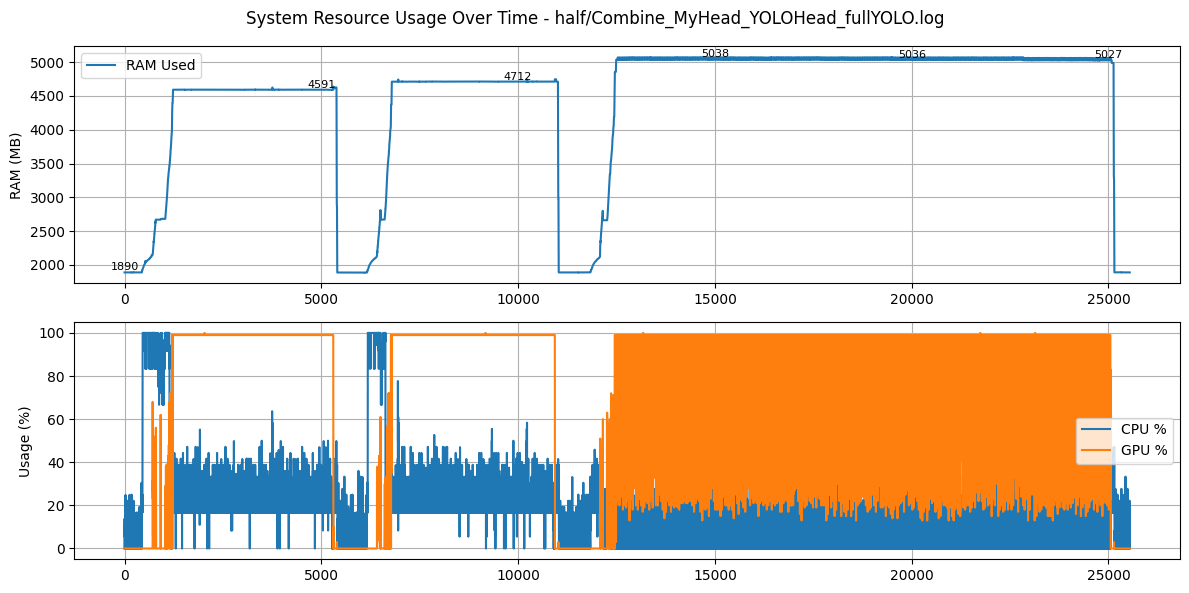

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

# list storage data
timestamps = []
cpu_usage = []
gpu_usage = []
ram_usage = []
cpu_temp = []
gpu_temp = []

# Regex patterns
cpu_pat = re.compile(r'CPU \[([0-9%@,]+)\]')
gpu_pat = re.compile(r'GR3D_FREQ (\d+)%')
ram_pat = re.compile(r'RAM (\d+)/(\d+)MB')
cpu_tmp_pat = re.compile(r'CPU@([0-9.]+)C')
gpu_tmp_pat = re.compile(r'GPU@([0-9.]+)C')

# Read log file and extract data
with open(LOG_FILE, 'r') as f:
    for i, line in enumerate(f):
        timestamps.append(i)  

        # CPU
        m = cpu_pat.search(line)
        if m:
            core_vals = m.group(1).split(',')
            vals = [int(v.split('%')[0]) for v in core_vals]
            cpu_usage.append(sum(vals)/len(vals))
        else:
            cpu_usage.append(None)

        # GPU
        m = gpu_pat.search(line)
        gpu_usage.append(int(m.group(1)) if m else None)

        # RAM
        m = ram_pat.search(line)
        if m:
            ram_used = int(m.group(1))
            ram_usage.append(ram_used)
        else:
            ram_usage.append(None)

        # Temp CPU
        m = cpu_tmp_pat.search(line)
        cpu_temp.append(float(m.group(1)) if m else None)

        # Temp GPU
        m = gpu_tmp_pat.search(line)
        gpu_temp.append(float(m.group(1)) if m else None)

# Visualization

plt.figure(figsize=(12, 6))
plt.suptitle(f"System Resource Usage Over Time - {LOG_FILE}")

# SUBPLOT 1 - RAM
plt.subplot(2, 1, 1)
plt.plot(timestamps, ram_usage, label="RAM Used")

step = 5000
for i in range(0, len(timestamps), step):
    if ram_usage[i] is not None:   
        plt.text(
            timestamps[i], ram_usage[i],
            f"{ram_usage[i]:.0f}",   
            fontsize=8,
            ha='center',
            va='bottom'
        )

plt.ylabel("RAM (MB)")
plt.grid(True)
plt.legend()

# SUBPLOT 2 - CPU and GPU Usage percentage

plt.subplot(2, 1, 2)
plt.plot(timestamps, cpu_usage, label="CPU %")
plt.plot(timestamps, gpu_usage, label="GPU %")

plt.ylabel("Usage (%)")
plt.xticks(np.arange(0, len(timestamps) + 1, 5000))  # ticks every 5000
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
print(f"RAM Drop Percentages when use My Head : {1 - (4591 - 1890)/(5038 - 1890):.2%}")
print(f"RAM Drop Percentages when use YOLO Head : {1 - (4712 - 1890)/(5038 - 1890):.2%}")

RAM Drop Percentages when use My Head : 14.20%
RAM Drop Percentages when use YOLO Head : 10.36%
